In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the data

df = pd.read_csv('SalesBikes.csv')
print(df.head())

print(df.info())


         Date  Day     Month  Year  Customer_Age       Age_Group  \
0  2013-11-26   26  November  2013            19     Youth (<25)   
1  2015-11-26   26  November  2015            19     Youth (<25)   
2  2014-03-23   23     March  2014            49  Adults (35-64)   
3  2016-03-23   23     March  2016            49  Adults (35-64)   
4  2014-05-15   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia   New South Wales      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  \
0  Hitch Rack - 4-Bike         

In [12]:
#Calcular y presentar estadísticas básicas (media, mediana, moda, desviación estándar).
print(df.describe())
print(df.shape)

                 Day           Year   Customer_Age  Order_Quantity  \
count  113036.000000  113036.000000  113036.000000   113036.000000   
mean       15.665753    2014.401739      35.919212       11.901660   
std         8.781567       1.272510      11.021936        9.561857   
min         1.000000    2011.000000      17.000000        1.000000   
25%         8.000000    2013.000000      28.000000        2.000000   
50%        16.000000    2014.000000      35.000000       10.000000   
75%        23.000000    2016.000000      43.000000       20.000000   
max        31.000000    2016.000000      87.000000       32.000000   

           Unit_Cost     Unit_Price         Profit           Cost  \
count  113036.000000  113036.000000  113036.000000  113036.000000   
mean      267.296366     452.938427     285.051665     469.318695   
std       549.835483     922.071219     453.887443     884.866118   
min         1.000000       2.000000     -30.000000       1.000000   
25%         2.000000    

In [14]:
#Crear tablas de frecuencia para al menos una variable

frequency_table = df['Product_Category'].value_counts()
print(frequency_table)


Product_Category
Accessories    70120
Bikes          25982
Clothing       16934
Name: count, dtype: int64


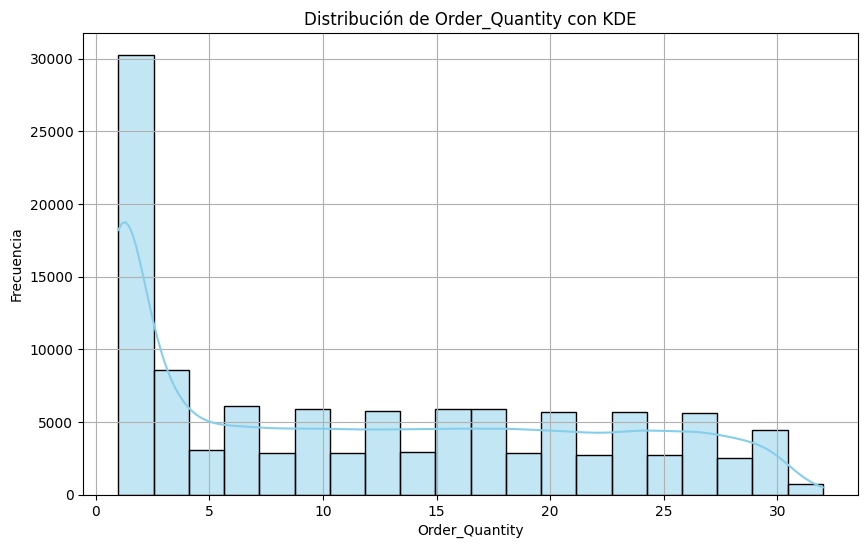

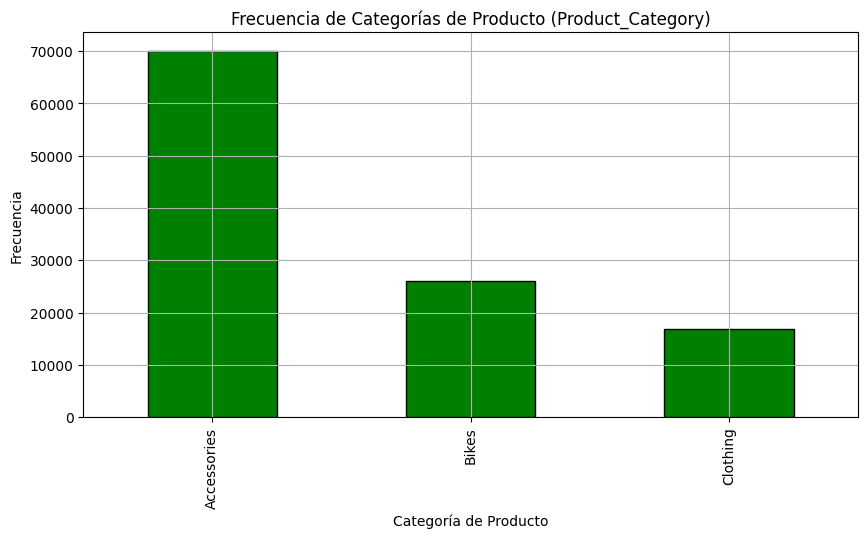

In [19]:
#Realizar al menos dos resúmenes gráficos (histograma, gráfico de barras,etc.)

# Histograma de la columna 'Order_Quantity'
plt.figure(figsize=(10, 6))
sns.histplot(df['Order_Quantity'], kde=True, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Order_Quantity con KDE')
plt.xlabel('Order_Quantity')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Gráfico de barras para la columna 'Product_Category'

plt.figure(figsize=(10, 5))
df['Product_Category'].value_counts().plot(kind='bar', color='green', edgecolor='black')
plt.title('Frecuencia de Categorías de Producto (Product_Category)')
plt.xlabel('Categoría de Producto')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()



In [21]:
from scipy import stats

# Calcular correlaciones
correlation_order_profit = df[['Order_Quantity', 'Profit']].corr().iloc[0, 1]
correlation_cost_price = df[['Unit_Cost', 'Unit_Price']].corr().iloc[0, 1]

# Regresión simple para Order_Quantity y Profit
slope_order_profit, intercept_order_profit, r_value_order_profit, p_value_order_profit, std_err_order_profit = stats.linregress(df['Order_Quantity'], df['Profit'])

# Regresión simple para Unit_Cost y Unit_Price
slope_cost_price, intercept_cost_price, r_value_cost_price, p_value_cost_price, std_err_cost_price = stats.linregress(df['Unit_Cost'], df['Unit_Price'])

# Resultados
{
    'correlation_Orden_Ganancia': correlation_order_profit,
    'correlation_Costo_precio': correlation_cost_price,
    'r_value_Orden_Ganancia': r_value_order_profit,
    'p_value_Orden_Ganancia': p_value_order_profit,
    'r_value_costo_precio': r_value_cost_price,
    'p_value_costo_precio': p_value_cost_price
}


{'correlation_Orden_Ganancia': -0.23886342119372153,
 'correlation_Costo_precio': 0.9978935825333143,
 'r_value_Orden_Ganancia': -0.23886342119371676,
 'p_value_Orden_Ganancia': 0.0,
 'r_value_costo_precio': 0.9978935825333042,
 'p_value_costo_precio': 0.0}

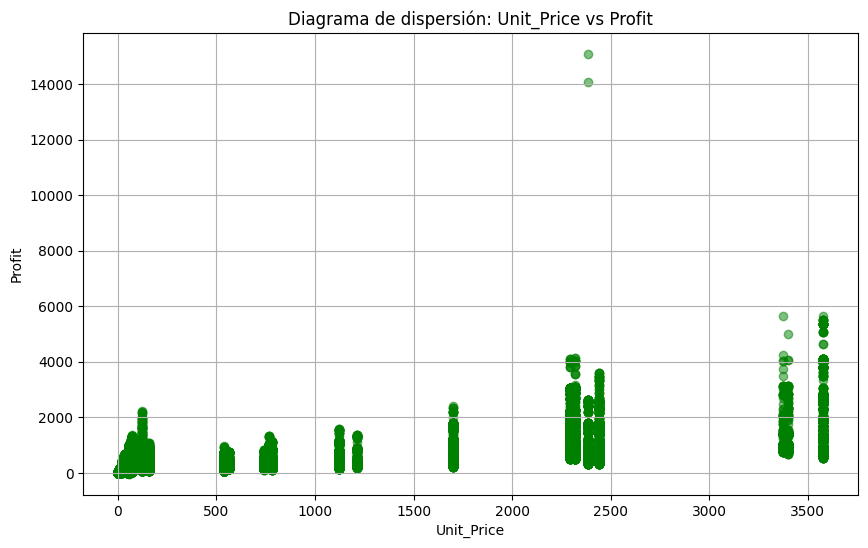

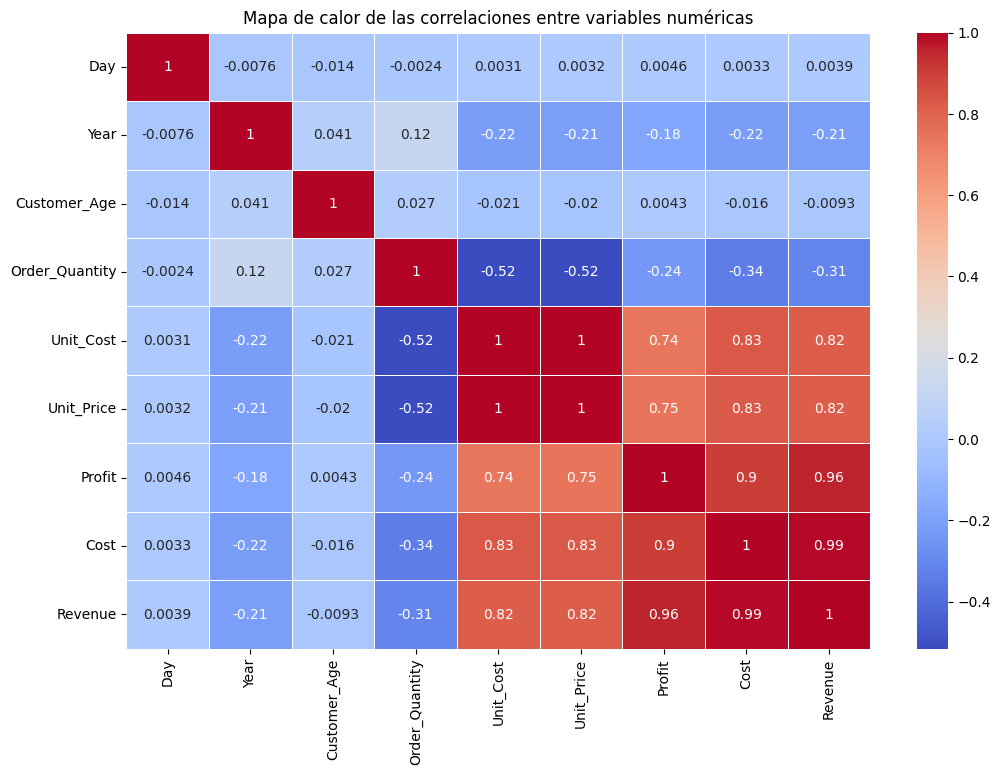

In [24]:
# Diagrama de dispersión entre 'Profit' y 'Unit_Price'
plt.figure(figsize=(10, 6))
plt.scatter(df['Unit_Price'], df['Profit'], alpha=0.5, color='green')
plt.title('Diagrama de dispersión: Unit_Price vs Profit')
plt.xlabel('Unit_Price')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

# Filtrar solo las columnas numéricas antes de calcular la correlación
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr_matrix_fixed = df_numeric.corr()

# Crear el mapa de calor actualizado
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_fixed, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor de las correlaciones entre variables numéricas')
plt.show()


In [26]:
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

# Variables seleccionadas para el análisis (clustering y anomalías)
selected_columns = ['Unit_Price', 'Order_Quantity', 'Profit', 'Revenue']

# Normalización de los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[selected_columns])

# Aplicación de K-Means para Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Agregar los resultados de clustering al dataset
df['Cluster'] = clusters

# Aplicación de Isolation Forest para detección de anomalías
iso_forest = IsolationForest(contamination=0.05, random_state=42)
anomalies = iso_forest.fit_predict(data_scaled)

# Agregar los resultados de anomalías al dataset
df['Anomaly'] = anomalies

# Mostrar los primeros resultados
df[['Unit_Price', 'Order_Quantity', 'Profit', 'Revenue', 'Cluster', 'Anomaly']].head()


,Unit_Price,Order_Quantity,Profit,Revenue,Cluster,Anomaly
0,120,8,590,950,0,1
1,120,8,590,950,0,1
2,120,23,1366,2401,2,-1
3,120,20,1188,2088,2,-1
4,120,4,238,418,0,1


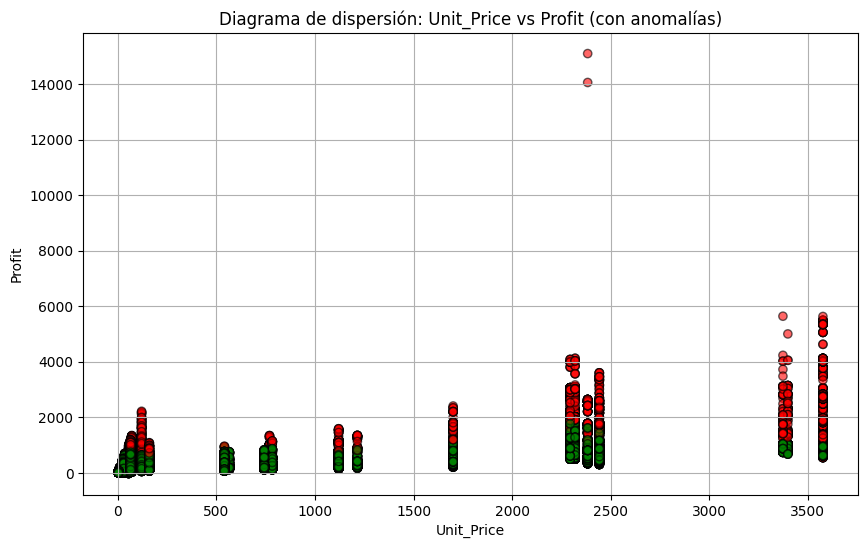

In [28]:
# Visualizar el diagrama de dispersión con diferentes colores para las anomalías
plt.figure(figsize=(10, 6))

# Anomalías
colors = ['green' if x == 1 else 'red' for x in df['Anomaly']]

# Diagrama de dispersión con colores que indican las anomalías
plt.scatter(df['Unit_Price'], df['Profit'], c=colors, alpha=0.6, edgecolor='black')
plt.title('Diagrama de dispersión: Unit_Price vs Profit (con anomalías)')
plt.xlabel('Unit_Price')
plt.ylabel('Profit')
plt.grid(True)
plt.show()
